In [1]:
import torch
import sys
sys.path.append('../')
from DataType.ElectricField import ElectricField
#from Components.Hologram_v2 import HologramElement
from Props.RSC_Prop import RSC_prop
from Props.CZT_Prop import CZT_prop
from utils.Helper_Functions import normalize
import numpy as np
import scipy.io
import time
import torch.nn as nn
from utils.units import *
torch.__version__

'2.5.0a0+872d972e41.nv24.08'

In [2]:
from DataType.ElectricField import ElectricField
# ElectricFields are 4D objects: 
# B x C x H x W
# BATCH x Channel (Wavelength) x Height x Width

N = 512
field_data = torch.zeros(1,2,N,N) + 0j # 0j to make it complex

# Set ones to the field
field_data[...,N//4 : 3 * N//4, N//4 : 3 * N//4] = 1

# Cast into our Datatype
field_input = ElectricField(
    data = field_data, 
    wavelengths = [600 * nm, 800 * nm],
    spacing = 6.4 * um,
)

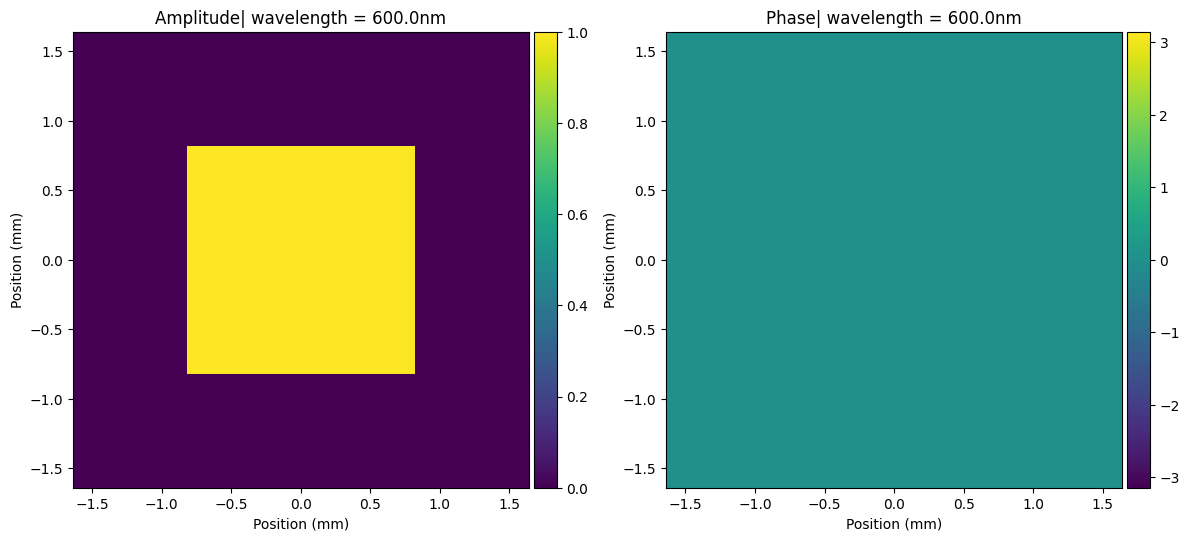

In [3]:
field_input.visualize(figsize=(12, 12), wavelength=600 * nm, flag_axis=True, intensity=False)

In [4]:
rsc_prop = RSC_prop(z_distance=300 * mm)

In [5]:
field_propagated_rsc = rsc_prop.forward(
    field = field_input
)

Minimum propagation distance to satisfy energy conservation: 69.820 mm
Minimum propagation distance to satisfy sampling for FT: 69.828 mm
The simulation will be accurate !


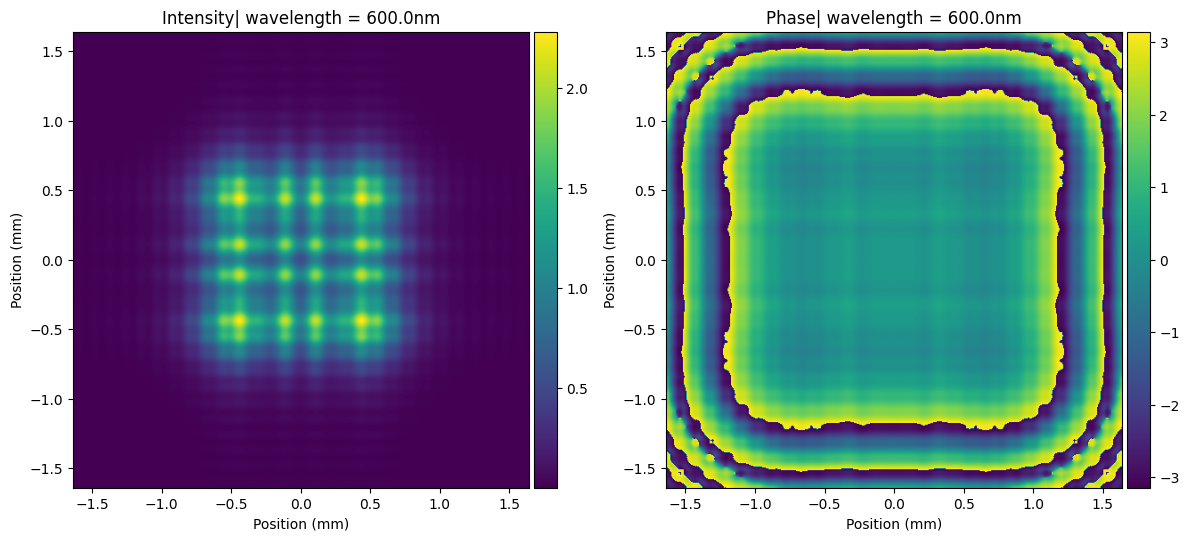

In [6]:
field_propagated_rsc.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)

In [7]:
czt_prop = CZT_prop(z_distance=300 * mm)

In [10]:
field_propagated_czt = czt_prop.forward(
    field = field_input,
    outputHeight=512,
	outputWidth=512, 						
	outputPixel_dx=6.4 * um, 
	outputPixel_dy=6.4 * um,
)

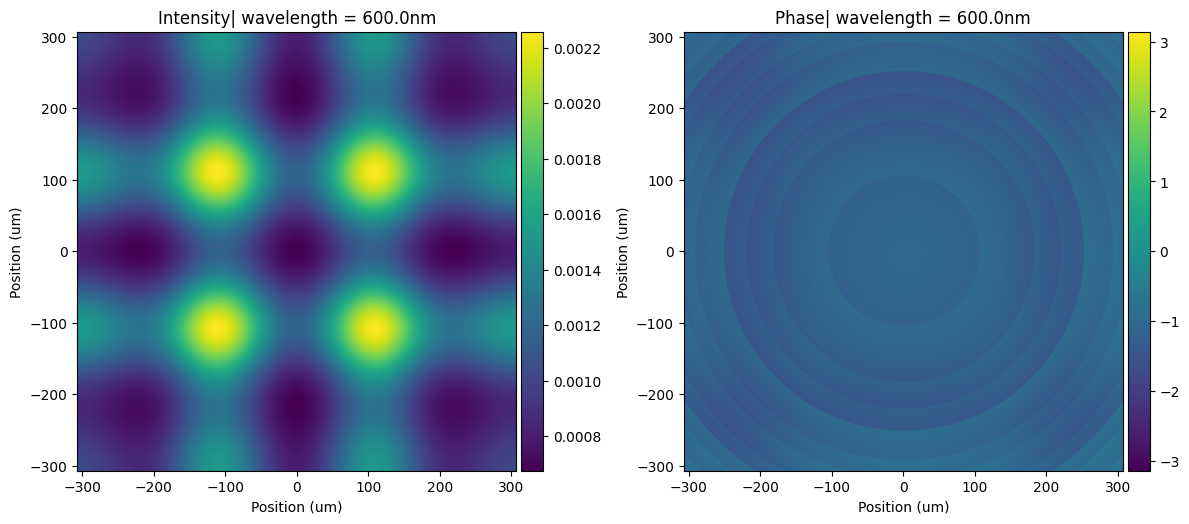

In [11]:
field_propagated_czt.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)